In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-2 data\data-3\raw.githubusercontent.com_dsrscientist_DSData_master_loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.drop(['Loan_ID'],inplace=True,axis=1) # remove unwanted column

In [5]:
data.isna().sum()  #checking null values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [7]:
# filling all nan values
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())     # continious data so we select mean
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [8]:
data.isna().sum()  #checking null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# data visulization¶

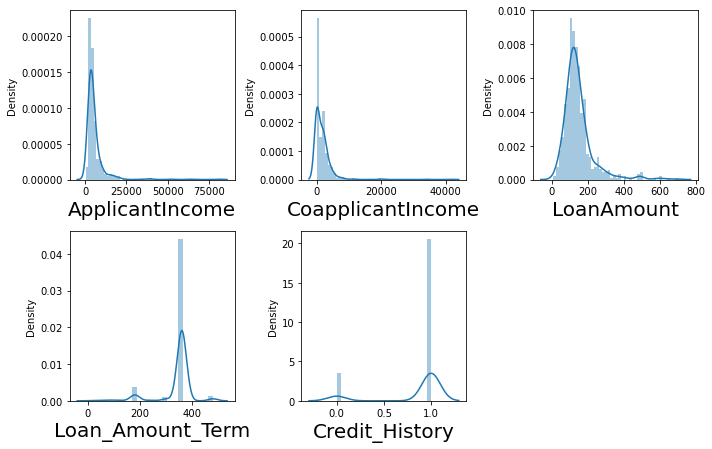

In [11]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# removing outliers with stsandarization method

In [12]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,577.000000,577.000000,577.000000,577.000000,577.000000
mean,4666.020797,1420.807487,136.048644,348.041594,0.850953
std,2965.452652,1651.545352,56.193532,51.845909,0.356444
min,150.000000,0.000000,9.000000,180.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3750.000000,1255.000000,128.000000,360.000000,1.000000
75%,5532.000000,2253.000000,160.000000,360.000000,1.000000
max,20667.000000,8980.000000,380.000000,480.000000,1.000000


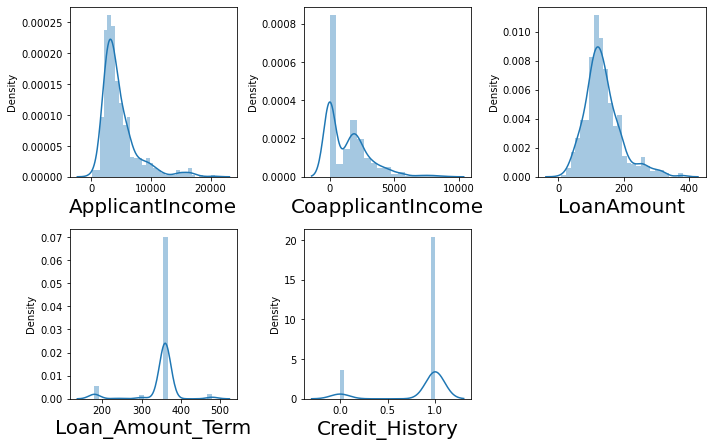

In [13]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [15]:
for i in (categorical):
    if data.dtypes[i]=='object':
        data[i] = lab_enc.fit_transform(data[i])

# To find the relation between feature we use heat map¶

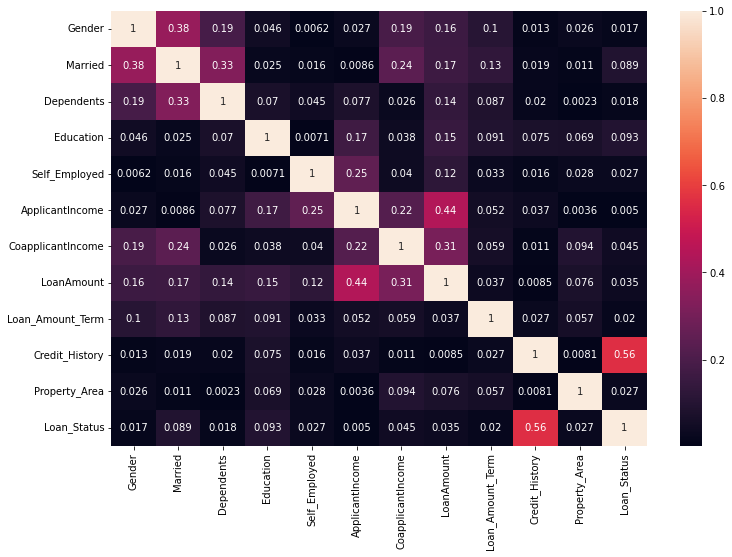

In [16]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [17]:
# corelation with label
relation['Loan_Status'].sort_values(ascending=False) # cheking corelation

Loan_Status          1.000000
Credit_History       0.560936
Education            0.092658
Married              0.089026
CoapplicantIncome    0.045009
LoanAmount           0.035289
Self_Employed        0.026525
Property_Area        0.026507
Loan_Amount_Term     0.020291
Dependents           0.017872
Gender               0.017408
ApplicantIncome      0.005003
Name: Loan_Status, dtype: float64

In [18]:
#seprating features and label
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

# model confidance/accuracy

In [20]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [21]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 80.46%


 Test classification Report
               precision    recall  f1-score   support

           0       0.73      0.49      0.59        49
           1       0.82      0.93      0.87       125

    accuracy                           0.80       174
   macro avg       0.77      0.71      0.73       174
weighted avg       0.80      0.80      0.79       174



# lets tune parameter useing gridsearch cv

In [23]:
#randomclassifier
params={
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_split':[10,11],
    'min_samples_leaf':[5,6]
    }
grid=GridSearchCV(random_clf,param_grid=params)
grid.fit(x_train,y_train)
print('best param=',grid.best_params_)

best param= {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [24]:
random_clf=grid.best_estimator_        # 2nd way to ('criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13)
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [25]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 82.88%

========== Test Result========
Accuracy score: 82.76%


 Test classification Report
               precision    recall  f1-score   support

           0       0.85      0.47      0.61        49
           1       0.82      0.97      0.89       125

    accuracy                           0.83       174
   macro avg       0.84      0.72      0.75       174
weighted avg       0.83      0.83      0.81       174



# here some accuracy increased but trainning score increased but accuracy is good

# we can increased trainning score by alter some hyper tunning